In [23]:
%matplotlib inline
from os import listdir
from os.path import isfile, join
import os
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
path = r"C:\Users\54922\GITHUB\vision_computadora_I\Material_TPs\TP4"
files_names = os.listdir(path)
print(files_names)

['Imagen1.png', 'Imagen2.png', 'Imagen3.png', 'Imagen4.png', 'Imagen5.png']


In [24]:
# Lectura de imagenes en un vector
onlyfiles = [ f for f in listdir(path) if isfile(join(path,f)) ]
img = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  img[n] = cv.imread( join(path,onlyfiles[n]) )

In [25]:
def LBP(image):
    #   LBP descriptor de texturas
    #   El metodo se aplica a las imagenes en gris. 
    #gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) #error dice invalida cantidad de canales
    #imgLBP = np.zeros_like(gray_image)
    #gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    """
    If the intensity of the center pixel is greater-than-or-equal to its neighbor,
    then we set the value to 1; otherwise, we set it to 0. With 8 surrounding pixels,
    we have a total of 2 ^ 8 = 256 possible combinations of LBP codes.
    """
    gray=image
    imgLBP = np.zeros_like(gray)
    pix = 3 
    for ih in range(0,gray.shape[0] - pix):
        for iw in range(0,gray.shape[1] - pix):
            ### 3x3 pixeles
            img          = gray[ih:ih+pix,iw:iw+pix]
            center       = img[1,1]
            img01        = (img >= center)*1.0
            img01_vector = img01.T.flatten()
            img01_vector = np.delete(img01_vector,4)
            where_img01_vector = np.where(img01_vector)[0]
            if len(where_img01_vector) >= 1:
                num = np.sum(2**where_img01_vector)
            else:
                num = 0
            imgLBP[ih+1,iw+1] = num
    return(imgLBP)

Since a 3 x 3 neighborhood has 2 ^ 8 = 256 possible patterns,
our LBP 2D array thus has a minimum value of 0 and a maximum value of 255,
allowing us to construct a 256-bin histogram of LBP codes as our final feature vector.
Finally, we can compute a histogram that tabulates the number of times each LBP pattern occurs. 
We can treat this histogram as our feature vector.


In [26]:
def hist(img):
    frecuencias, extremos = np.histogram(img, bins=range(0,257))
    return frecuencias 


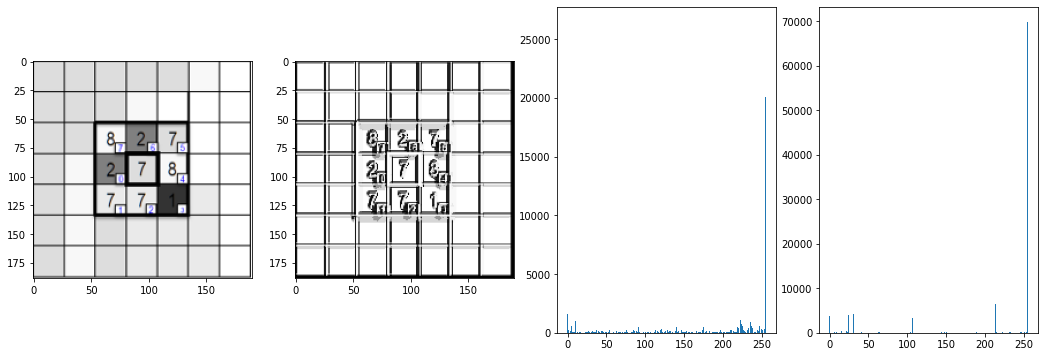

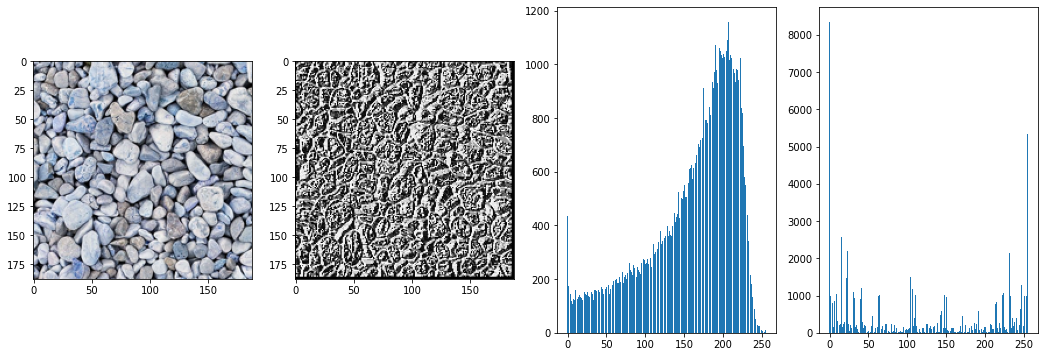

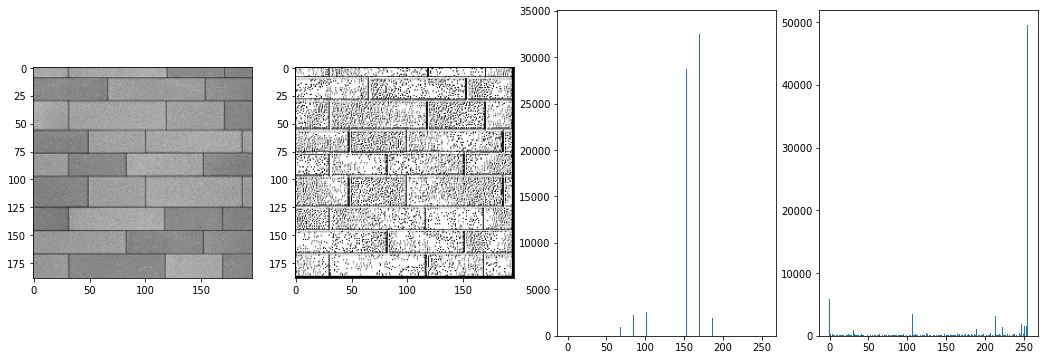

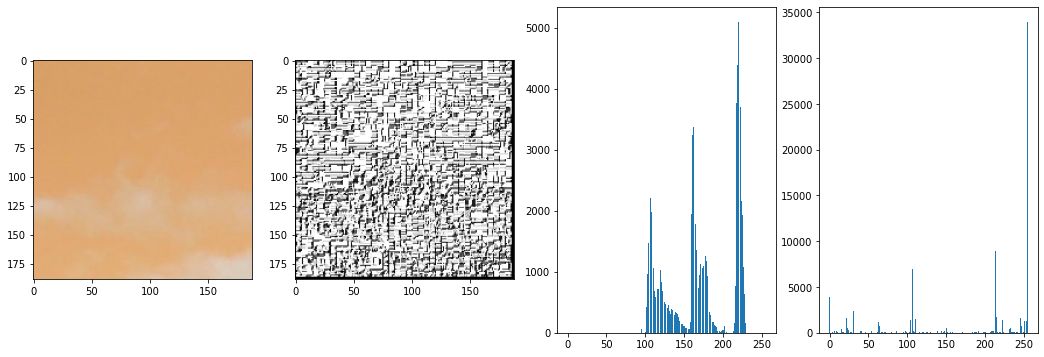

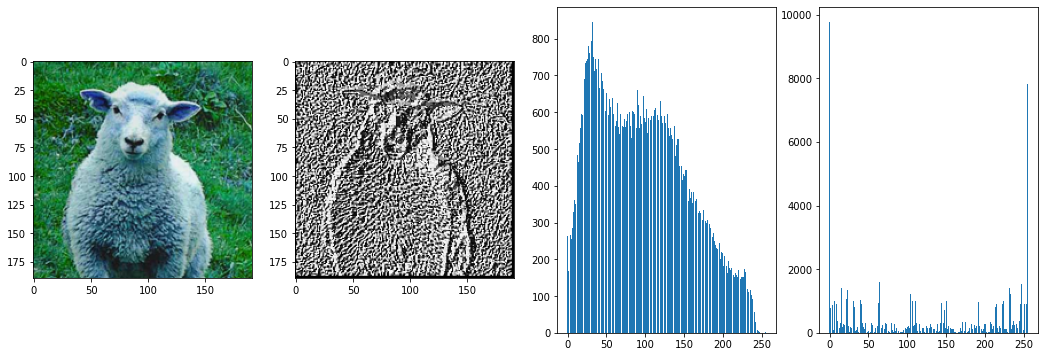

In [31]:
for i in range(0,len(img)):
    fig, axs = plt.subplots(1, 4, figsize=(18, 6))
    img_ = LBP(img[i])
    axs[0].imshow(img[i], cmap='gray')
    axs[1].imshow(img_, cmap='gray')
    axs[2].bar(np.arange(0,256),hist(img[i]))
    axs[3].bar(np.arange(0,256),hist(img_))